In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
Stock_df = pd.read_csv(r"C:\Users\ilaky\Documents\DataScience\Project_01\Files\Project_01_Stock_Analysis_Cleaned.csv")

In [12]:
# del Stock_df["Unnamed: 0"]

In [13]:
Stock_df.head(2)

,Stock_Name,Current_Price (₹),Market Cap,Return_On_Equity (ROE) %,Price_to_Earnings_ratio (P/E),Industry P/E,Earnings_per_share (EPS),Price_to_Book_ratio (P/B),Dividend Yield %,Debt_to_Equity,Revenue_Growth %,Profit_Growth %,Net_Profit_Margin %,EBITDA Margin %
0,AGI Greenpac,864.35,MId cap,15.37,16.17,21.60,53.80,2.68,0.80,0.26,25.08,40.52,12.92,18.70
1,ASK Automotive,513.90,MId cap,23.74,39.59,39.18,13.03,9.75,0.19,0.39,-7.22,0.82,7.49,10.25


In [14]:
Stock_df.columns

Index(['Stock_Name', 'Current_Price (₹)', 'Market Cap',
       'Return_On_Equity (ROE) %', 'Price_to_Earnings_ratio (P/E)',
       'Industry P/E', 'Earnings_per_share (EPS)', 'Price_to_Book_ratio (P/B)',
       'Dividend Yield %', 'Debt_to_Equity', 'Revenue_Growth %',
       'Profit_Growth %', 'Net_Profit_Margin %', 'EBITDA Margin %'],
      dtype='object')

## Checking Data Types

In [15]:
Stock_df.select_dtypes("O")

,Stock_Name,Market Cap
0,AGI Greenpac,MId cap
1,ASK Automotive,MId cap
2,AU Small Finance Bank,Large cap
3,AWL Agri Business,Large cap
4,Aadhar Housing Finance,Large cap
...,...,...
444,Zee Entertainment Enterprises,MId cap
445,Zensar Technologies,MId cap
446,Zydus Lifesciences,Large cap
447,Zydus Wellness,MId cap


In [16]:
Stock_df.select_dtypes("number").head(2)

,Current_Price (₹),Return_On_Equity (ROE) %,Price_to_Earnings_ratio (P/E),Industry P/E,Earnings_per_share (EPS),Price_to_Book_ratio (P/B),Dividend Yield %,Debt_to_Equity,Revenue_Growth %,Profit_Growth %,Net_Profit_Margin %,EBITDA Margin %
0,864.35,15.37,16.17,21.60,53.80,2.68,0.80,0.26,25.08,40.52,12.92,18.70
1,513.90,23.74,39.59,39.18,13.03,9.75,0.19,0.39,-7.22,0.82,7.49,10.25


## Insights on the Dataframe:

 - From the above dataframe we have,
    - Categorical - 2
    - Numerical - 12

## Uni-variate Analysis

### Current_Price 

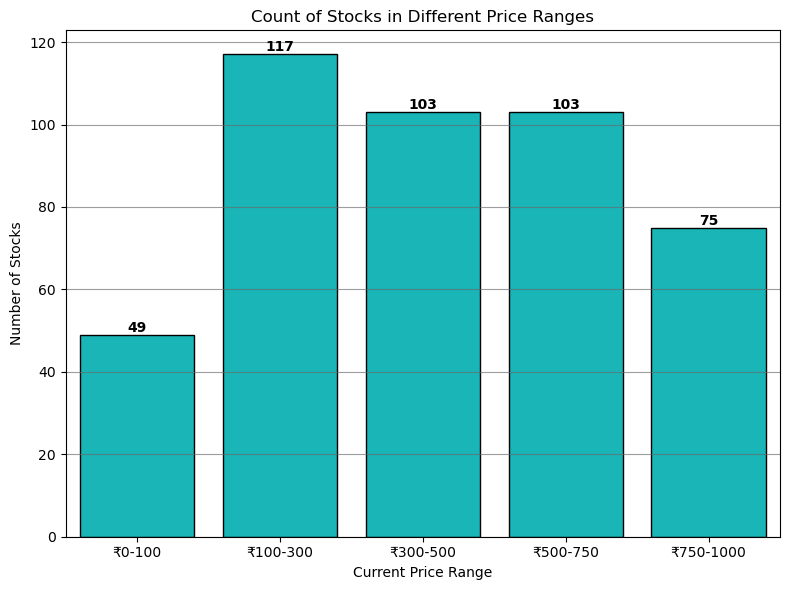

In [17]:
bins = [0, 100, 300, 500, 750, 1000]
labels = ['₹0-100', '₹100-300', '₹300-500', '₹500-750', '₹750-1000']
Stock_df['Price_Bin'] = pd.cut(Stock_df['Current_Price (₹)'],bins=bins,labels=labels,right=False,include_lowest=True)
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=Stock_df,x='Price_Bin',order=labels,color = "darkturquoise",edgecolor='black')
for p in ax.patches:
    count = int(p.get_height())
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()

    ax.text(x_pos, y_pos,f'{count}',ha='center',va='bottom',fontsize=10,fontweight='bold')
ax.set_title('Count of Stocks in Different Price Ranges')
ax.set_xlabel('Current Price Range')
ax.set_ylabel('Number of Stocks')
ax.grid(axis='y', alpha=0.65, color="dimgrey")
plt.tight_layout()
plt.show()

**`Insights:`**






- From the chart, Majority stocks concentrated on 100-300 price range.
- The highest & Lowest priced bin contain the fewest stocks.
- The frequency generally decreases as the price increases, confirming the highly skewed nature of the price distribution, even in the mid and large-cap segments.
- One can invest in large volume in a low priced stocks ranging 100-300, as with number of stocks increase the probability of quality stocks increases.


### Market Cap

In [18]:
Stock_df["Market Cap"].value_counts()

Market Cap
MId cap      282
Large cap    167
Name: count, dtype: int64

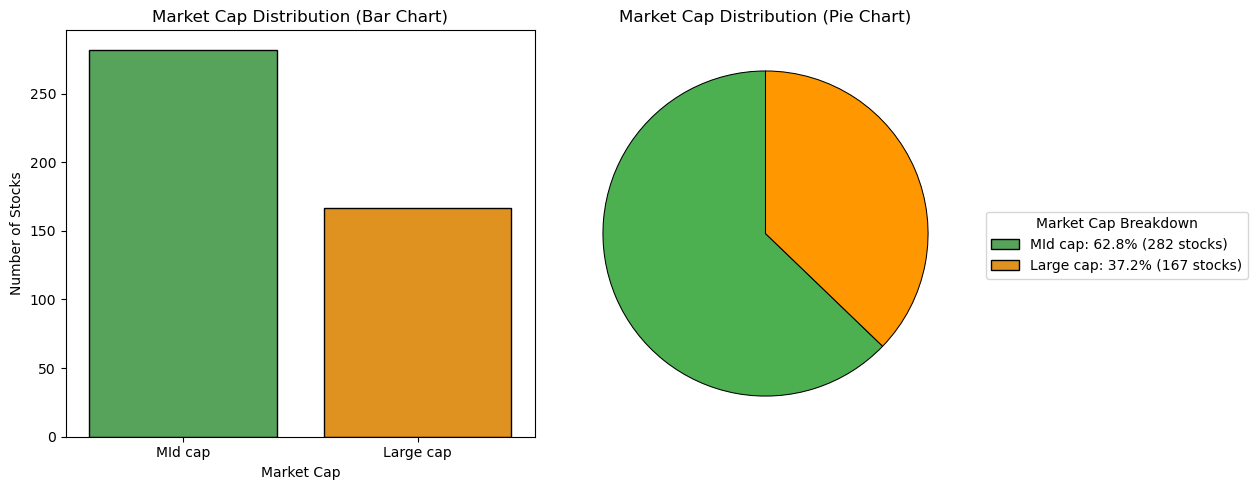

In [19]:
market_cap_counts = Stock_df["Market Cap"].value_counts()
total_stocks = market_cap_counts.sum()
market_cap_percentages = (market_cap_counts / total_stocks) * 100
colors = ['#4CAF50', '#FF9800']

legend_labels = []
for cap_type, count in market_cap_counts.items():
    percent = market_cap_percentages[cap_type]
    label = f"{cap_type}: {percent:.1f}% ({count} stocks)"
    legend_labels.append(label)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=Stock_df, x='Market Cap',order=market_cap_counts.index, hue='Market Cap',palette=colors,edgecolor='black',ax=axes[0])
axes[1].pie(market_cap_counts,startangle=90,colors=colors,wedgeprops={'edgecolor': 'black', 'linewidth': 0.75})
axes[1].set_title("Market Cap Distribution (Pie Chart)")
axes[0].set_title('Market Cap Distribution (Bar Chart)')
axes[0].set_xlabel('Market Cap')
axes[0].set_ylabel('Number of Stocks')
fig.legend(legend_labels,title="Market Cap Breakdown",loc="center right",bbox_to_anchor=(1.05, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

**`Insights:`**






- From the chart, Sample contains 62.8 % Mid cap stocks and the rest 37.2 % Large Cap.
- In the price range of below ₹1000, majority stocks are concentrated on Mid cap.
- Conclusion : There are fewer large cap compaines holding majority in Market value compared to Mid cap.

### Return_On_Equity (ROE) %

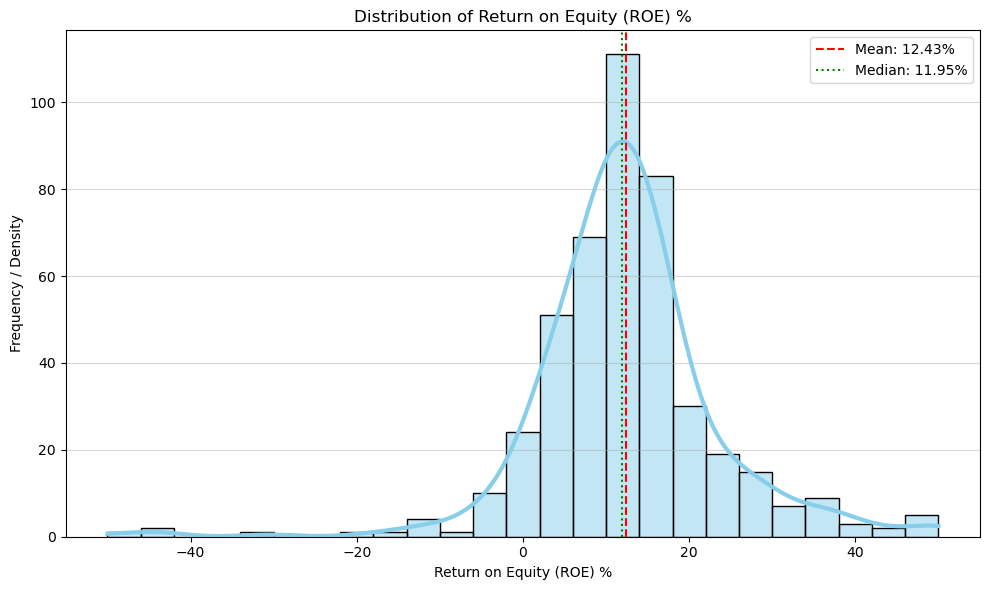

In [20]:
ROE_Clip_value = Stock_df['Return_On_Equity (ROE) %'].clip(lower=-50, upper=50)
plt.figure(figsize=(10, 6))

sns.histplot(ROE_Clip_value, bins=25, kde=True, color='skyblue',edgecolor='black',line_kws={'linewidth': 3, 'color': 'darkblue'})
plt.axvline(ROE_Clip_value.mean(), color='red', linestyle='--', linewidth=1.5, label=f"Mean: {ROE_Clip_value.mean():.2f}%")
plt.axvline(ROE_Clip_value.median(), color='green', linestyle=':', linewidth=1.5, label=f"Median: {ROE_Clip_value.median():.2f}%")
plt.legend()
plt.title('Distribution of Return on Equity (ROE) %')
plt.xlabel('Return on Equity (ROE) %')
plt.ylabel('Frequency / Density')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

**`Insights:`**






- The distribution is highly left-skewed, with a long tail extending into the low negative ROE values. The bulk of the data is concentrated on the lower end.
- The highest concentration of stocks lies in the 10% to 15% ROE range. Indicating average ROE of the sample stocks
- A noticeable number of companies are clustered around 0% and into the negative territory, indicating they are generating losses relative to shareholder equity.


### Price to Earnings

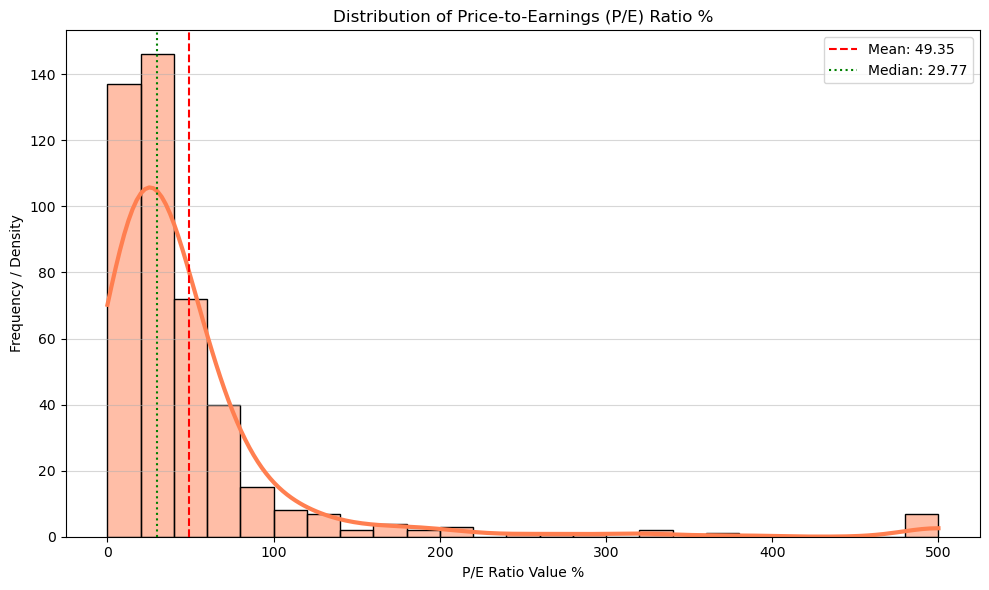

In [21]:
PE_Clip_value = Stock_df['Price_to_Earnings_ratio (P/E)'].clip(lower=0, upper=500)
plt.figure(figsize=(10, 6))
sns.histplot(PE_Clip_value, bins=25, kde=True, color='#FF7F50',edgecolor='black',line_kws={'linewidth': 3, 'color': 'darkgoldenrod'})
mean_pe = PE_Clip_value.mean()
median_pe = PE_Clip_value.median()
plt.axvline(mean_pe, color='red', linestyle='--', linewidth=1.5, label=f"Mean: {mean_pe:.2f}")
plt.axvline(median_pe, color='green', linestyle=':', linewidth=1.5, label=f"Median: {median_pe:.2f}")
plt.legend()

plt.title('Distribution of Price-to-Earnings (P/E) Ratio %')
plt.xlabel('P/E Ratio Value %')
plt.ylabel('Frequency / Density')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

**`Insights:`**

- The distribution is heavily right-skewed. The vast majority of stocks are concentrated at the lower P/E values.
- The highest frequency is in the 10 to 20 P/E range, which is generally considered a moderate valuation range.
- This plot indicates that while many stocks are reasonably priced (P/E < 30), a substantial portion is trading at premium valuations (P/E > 50).

### Dividend Yield %

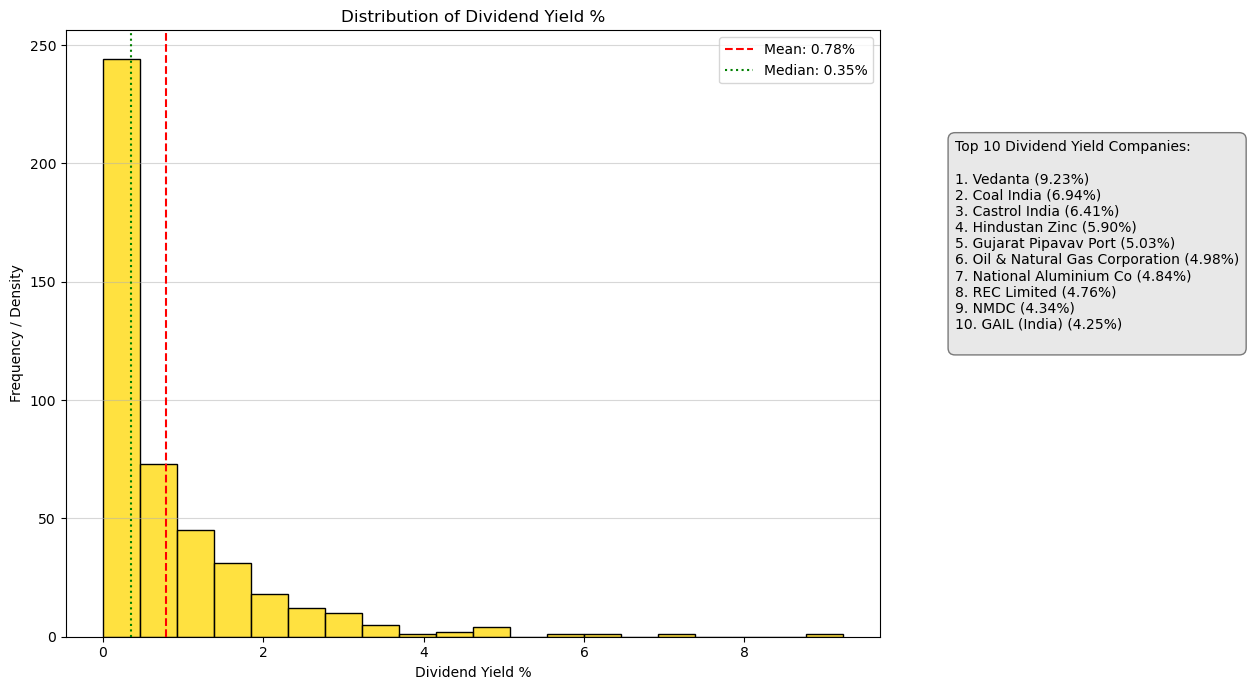

In [22]:
top_10_DY = Stock_df.sort_values(by='Dividend Yield %', ascending=False).head(10).reset_index(drop=True)
top_10_list_formatted = "Top 10 Dividend Yield Companies:\n\n"
for rank, row in top_10_DY.iterrows():
    top_10_list_formatted += f"{rank+1}. {row['Stock_Name']} ({row['Dividend Yield %']:.2f}%)\n"
plt.figure(figsize=(12, 7)) 
sns.histplot(Stock_df['Dividend Yield %'], bins=20,color='gold',edgecolor='black')

mean_dy = Stock_df['Dividend Yield %'].mean()
median_dy = Stock_df['Dividend Yield %'].median()
plt.axvline(mean_dy, color='red', linestyle='--', linewidth=1.5, label=f"Mean: {mean_dy:.2f}%")
plt.axvline(median_dy, color='green', linestyle=':', linewidth=1.5, label=f"Median: {median_dy:.2f}%")
plt.legend()
plt.title('Distribution of Dividend Yield %')
plt.xlabel('Dividend Yield %')
plt.ylabel('Frequency / Density')
plt.grid(axis='y', alpha=0.5)

plt.figtext(x=0.8, y=0.5,s=top_10_list_formatted, fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="lightgray", alpha=0.5))
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

**`Insights:`**

- The dividend yield distribution is highly skewed, with most companies paying a very low or no dividend.
- Very few companies are paying any dividend as 0 % is the kurtosis(peak) of the data.
- From the top 10 list, Mining/Mineral and Petroleum compaines are highest dividend paying stocks.

### Debt_to_Equity

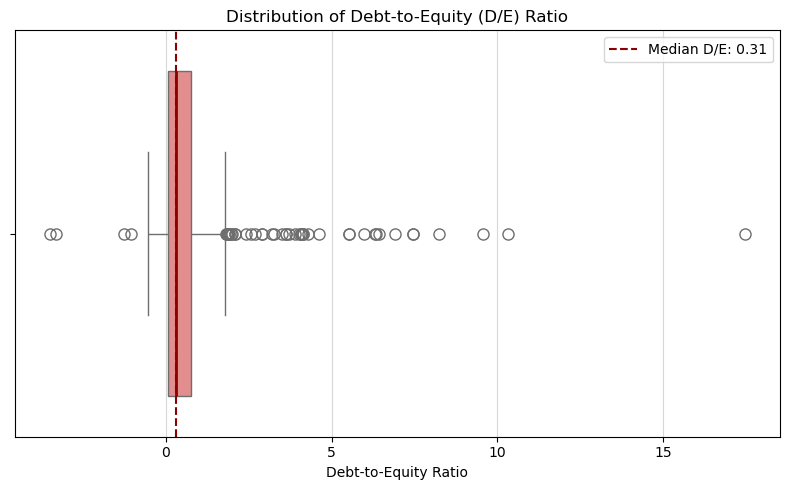

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=Stock_df, x='Debt_to_Equity', color='lightcoral',fliersize=8,medianprops={'color': 'darkred', 'linewidth': 2})
median_de = Stock_df['Debt_to_Equity'].median()
q3 = Stock_df['Debt_to_Equity'].quantile(0.75)
plt.axvline(median_de, color='darkred', linestyle='--', linewidth=1.5, label=f"Median D/E: {median_de:.2f}")
plt.title('Distribution of Debt-to-Equity (D/E) Ratio')
plt.xlabel('Debt-to-Equity Ratio')
plt.grid(axis='x', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**`Insights:`**






The plot confirms that the typical mid and large-cap stock is financially sound with low debt, but it also clearly flags the riskier, highly-leveraged outliers for further investigation.

### Profit Growth %

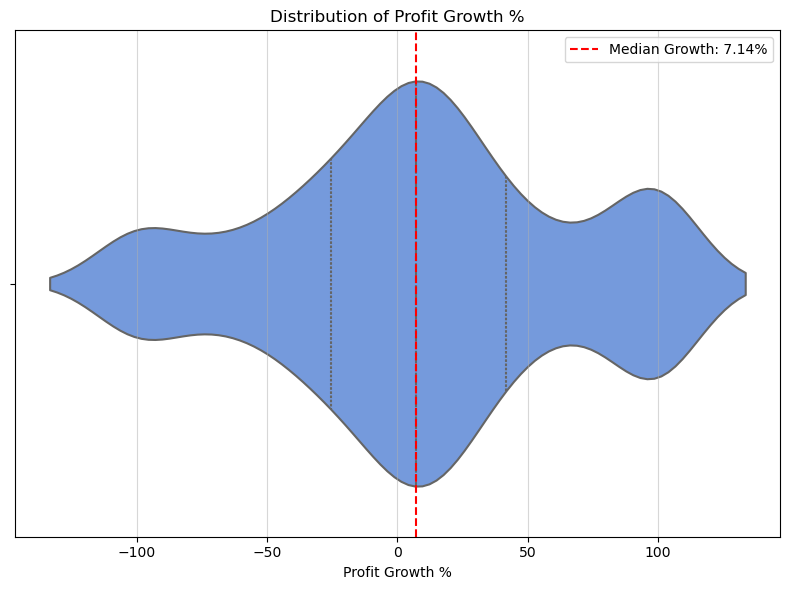

In [24]:
Profit_gro_Clipped_values = Stock_df['Profit_Growth %'].clip(lower=-100, upper=100)
plt.figure(figsize=(8, 6))
sns.violinplot(x=Profit_gro_Clipped_values, color='#6495ED',inner='quartile',linewidth=1.5,orient='h')
plt.title('Distribution of Profit Growth %')
plt.xlabel('Profit Growth %')
median_pg = Profit_gro_Clipped_values.median()
plt.axvline(median_pg, color='red', linestyle='--', linewidth=1.5, label=f"Median Growth: {median_pg:.2f}%")
plt.legend()
plt.grid(axis='x', alpha=0.5)
plt.tight_layout()
plt.show()

**`Insights:`**







- Massive Concentration near Zero: The violin shape is thinnest at the extreme ends and has a huge, dense bulge near 0%. This indicates a very high frequency of stocks with stagnant or low profit growth (between −25% and +40%).
- The violin shape is slightly skewed to the right, but the plot clearly shows the central tendency is quite low, indicating that while some companies have strong growth, the majority do not.
- This visualization confirms that profit growth is heavily concentrated around 0%.

### Profit Growth %

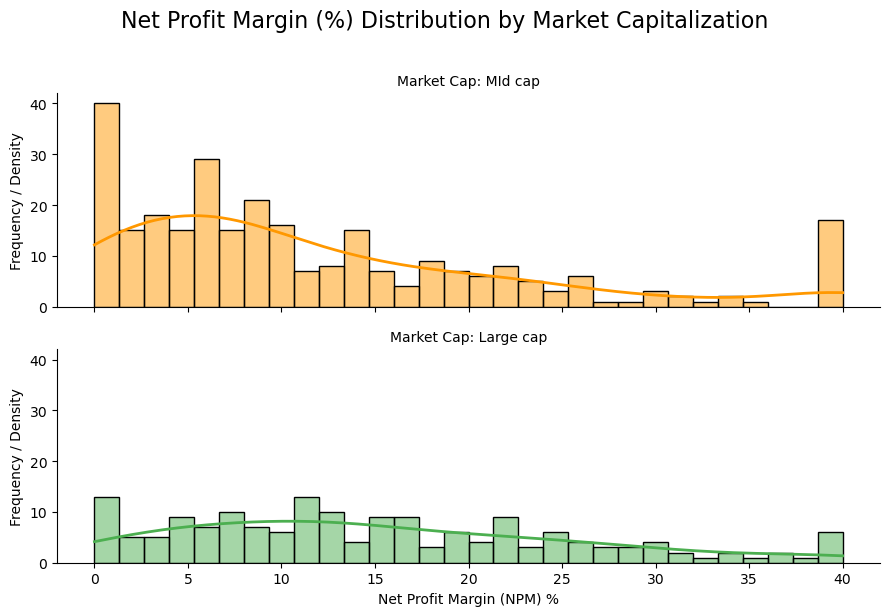

In [25]:
NPM_Clipped_values = Stock_df.copy()
NPM_Clipped_values['NPM'] = NPM_Clipped_values['Net_Profit_Margin %'].clip(lower=-0, upper=40)
g = sns.FacetGrid(NPM_Clipped_values, row='Market Cap', hue='Market Cap', aspect=3, height=3,palette={'MId cap': '#FF9800', 'Large cap': '#4CAF50'})
g.map(sns.histplot,'NPM', bins=30, kde=True, edgecolor='black',line_kws={'linewidth': 2})
g.set_titles("Market Cap: {row_name}")
g.fig.suptitle('Net Profit Margin (%) Distribution by Market Capitalization', fontsize=16, y=1.02)
g.set_axis_labels('Net Profit Margin (NPM) %', 'Frequency / Density')
plt.tight_layout()
plt.show()

**`Insights:`**

- Mid Cap the distribution is wider and flatter, indicating more variability in margins. 
- This reflects the greater inherent risk and less established market position often found in mid-cap companies.

- Large Cap the distribution is tighter and more heavily concentrated in the positive range (10% to 25%). 
- This suggest greater stability and generally higher margins, likely due to their scale and market dominance.

## Bi-variate 

## Chechking the stock valuation

## **Is my stock is undervalued or overvalued ?**

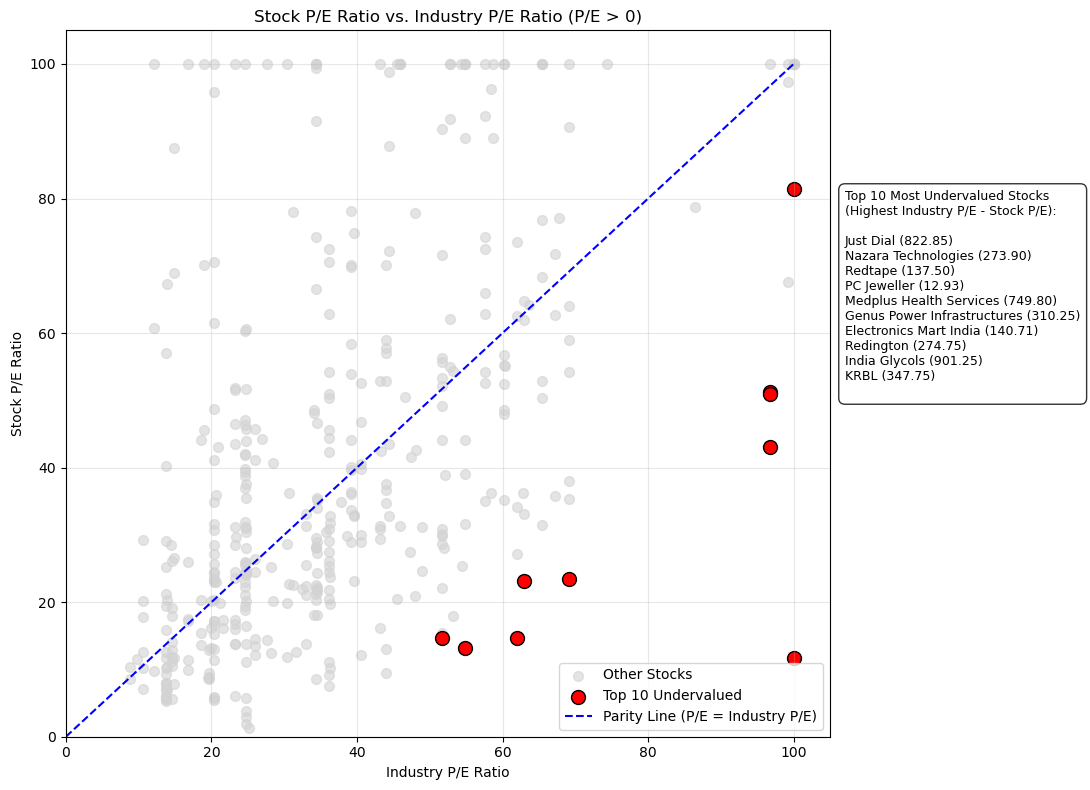

In [26]:
Stock_df_filtered = Stock_df[Stock_df['Price_to_Earnings_ratio (P/E)'] > 0].copy()
Stock_df_filtered['Relative_Value'] = Stock_df_filtered['Industry P/E'] - Stock_df_filtered['Price_to_Earnings_ratio (P/E)']
top_10_undervalued = Stock_df_filtered.sort_values(by='Relative_Value', ascending=False).head(10)
top_10_names = top_10_undervalued['Stock_Name'].tolist()

Stock_df_plot = Stock_df_filtered.copy()
Stock_df_plot['P_E_Clipped'] = Stock_df_plot['Price_to_Earnings_ratio (P/E)'].clip(upper=100)
Stock_df_plot['Industry_PE_Clipped'] = Stock_df_plot['Industry P/E'].clip(upper=100)
top_10_plot = Stock_df_plot[Stock_df_plot['Stock_Name'].isin(top_10_names)]
other_stocks = Stock_df_plot[~Stock_df_plot['Stock_Name'].isin(top_10_names)]

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(other_stocks['Industry_PE_Clipped'],other_stocks['P_E_Clipped'],color='lightgray',alpha=0.6,s=50,label='Other Stocks')
ax.scatter(top_10_plot['Industry_PE_Clipped'],top_10_plot['P_E_Clipped'],color='red',alpha=1,s=100,edgecolors='black',label='Top 10 Undervalued')
x_max = 100 ## Taking the max value from PE - clipped
ax.plot([0, x_max], [0, x_max], color='blue', linestyle='--', label='Parity Line (P/E = Industry P/E)')
top_10_list_formatted = "Top 10 Most Undervalued Stocks\n(Highest Industry P/E - Stock P/E):\n\n"
for rank, row in top_10_undervalued.iterrows():
    top_10_list_formatted += f"{row['Stock_Name']} ({row['Current_Price (₹)']:.2f})\n"
plt.figtext(x=0.85, y=0.5,s=top_10_list_formatted,fontsize=9,bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

ax.set_title('Stock P/E Ratio vs. Industry P/E Ratio (P/E > 0)')
ax.set_xlabel('Industry P/E Ratio')
ax.set_ylabel('Stock P/E Ratio')
ax.set_xlim(0, x_max * 1.05)
ax.set_ylim(0, x_max * 1.05)
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

**`Insights:`**

- Metric for Undervaluation is calculation of the difference Industry P/E - Stock P/E.
- A high positive difference indicates the stock is relatively undervalued compared to its industry.
- From the plot, The 10 top companies with relatively higher PE are mapped out.
- Nazara Technogies,Redington are some of the better option among the mapped out stocks.


### Comparision Bar Chart for P/E

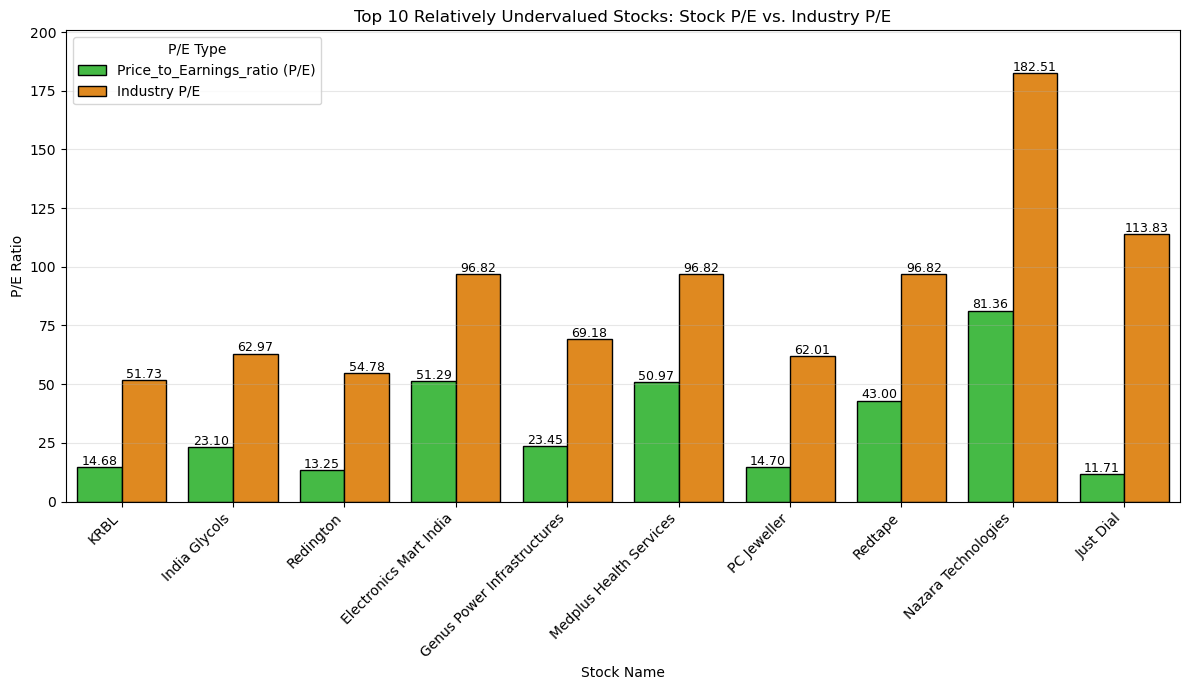

In [27]:
top_10_undervalued = top_10_undervalued.sort_values(by='Relative_Value', ascending=True)
Stock_df_melted = top_10_undervalued.melt(id_vars='Stock_Name',value_vars=['Price_to_Earnings_ratio (P/E)', 'Industry P/E'],var_name='PE_Type',value_name='P_E_Value')
plt.figure(figsize=(12, 7))
sns.barplot(data=Stock_df_melted,x='Stock_Name',y='P_E_Value',hue='PE_Type',palette={'Price_to_Earnings_ratio (P/E)': 'limegreen', 'Industry P/E': 'darkorange'},edgecolor='black')
ax = plt.gca()
for p in ax.patches:
    pe_value = p.get_height()
    if pe_value > 0:
        ax.text(p.get_x() + p.get_width() / 2., pe_value + 2.5,f'{pe_value:.2f}',ha='center', va='center',fontsize=9)
plt.title('Top 10 Relatively Undervalued Stocks: Stock P/E vs. Industry P/E')
plt.xlabel('Stock Name')
plt.ylabel('P/E Ratio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='P/E Type')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, Stock_df_melted['P_E_Value'].max() * 1.1)
plt.tight_layout()
plt.show()

**`Insights:`**

- In this chart, the Orange Bar of Industry P/E is significantly taller than the Green Bar of Stock P/E, Indicating the stocks are undervalued compared to their peers
- This visual confirms that these companies are trading at a P/E ratio lower than the average of their respective industries. As mentioned in the previous slide


## Undervalued and Quality Stocks (P/E vs. ROE)

### If my stock is undervalued, is it a quality stock to invest ?

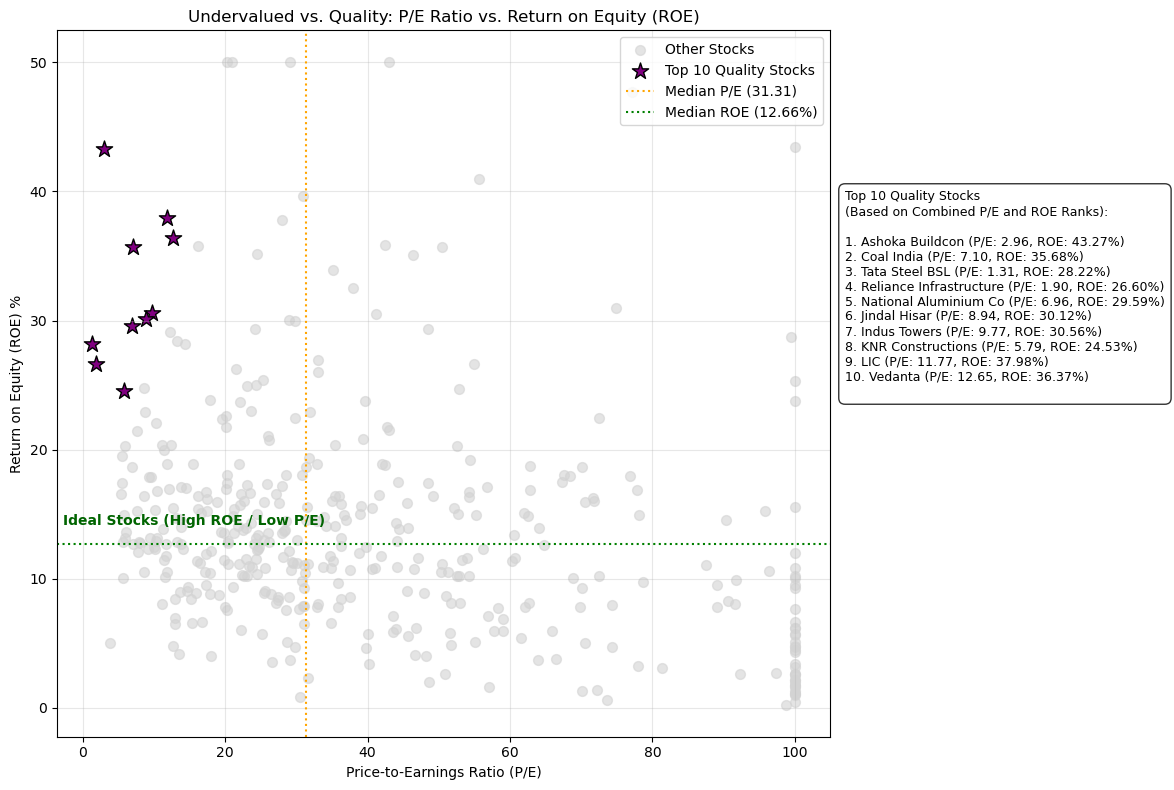

In [28]:
df_filtered = Stock_df[(Stock_df['Price_to_Earnings_ratio (P/E)'] > 0) & (Stock_df['Return_On_Equity (ROE) %'] > 0)].copy()
df_filtered['PE_Rank'] = df_filtered['Price_to_Earnings_ratio (P/E)'].rank(ascending=True)
df_filtered['ROE_Rank'] = df_filtered['Return_On_Equity (ROE) %'].rank(ascending=False)
df_filtered['Quality_Score'] = df_filtered['PE_Rank'] + df_filtered['ROE_Rank']
top_10_quality_stock = df_filtered.sort_values(by='Quality_Score', ascending=True).head(10).copy()
top_10_names = top_10_quality_stock['Stock_Name'].tolist()

df_plot = df_filtered.copy()
df_plot['P_E_Clipped'] = df_plot["Price_to_Earnings_ratio (P/E)"].clip(upper=100)
df_plot['ROE_Clipped'] = df_plot['Return_On_Equity (ROE) %'].clip(upper=50)
top_10_plot = df_plot[df_plot['Stock_Name'].isin(top_10_names)]
other_stocks = df_plot[~df_plot['Stock_Name'].isin(top_10_names)]

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(other_stocks['P_E_Clipped'],other_stocks['ROE_Clipped'],color='lightgray',alpha=0.6,s=50,label='Other Stocks')
ax.scatter(top_10_plot['P_E_Clipped'],top_10_plot['ROE_Clipped'],color='purple',alpha=1,s=150,edgecolors='black',marker='*',label='Top 10 Quality Stocks')
median_pe = df_plot['P_E_Clipped'].median()
median_roe = df_plot['ROE_Clipped'].median()
ax.axvline(median_pe, color='orange', linestyle=':', linewidth=1.5, label=f'Median P/E ({median_pe:.2f})')
ax.axhline(median_roe, color='green', linestyle=':', linewidth=1.5, label=f'Median ROE ({median_roe:.2f}%)')
ax.text(median_pe/2, median_roe * 1.1, 'Ideal Stocks (High ROE / Low P/E)', ha='center', va='bottom', fontsize=10, color='darkgreen', fontweight='bold')

top_10_list_formatted = "Top 10 Quality Stocks\n(Based on Combined P/E and ROE Ranks):\n\n"
for rank, row in top_10_quality_stock.iterrows():
    rank_display = top_10_quality_stock.index.get_loc(rank) + 1
    top_10_list_formatted += f"{rank_display}. {row['Stock_Name']} (P/E: {row['Price_to_Earnings_ratio (P/E)']:.2f}, ROE: {row['Return_On_Equity (ROE) %']:.2f}%)\n"
plt.figtext(x=0.85, y=0.5,s=top_10_list_formatted,fontsize=9,bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

ax.set_title('Undervalued vs. Quality: P/E Ratio vs. Return on Equity (ROE)')
ax.set_xlabel('Price-to-Earnings Ratio (P/E)')
ax.set_ylabel('Return on Equity (ROE) %')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

**`Insights:`**

- Desirability Score = Rank(P/E) + Rank(ROE)
- P/E is ranked ascending (lowest P/E gets rank 1).ROE is ranked descending (highest ROE gets rank 1).
- The lowest Desirability Score indicates the best balance of low valuation and high quality.

## Growth & Valuation: PEG -  Profit Growth % vs. P/E

### Finding a undervalued stock with good growth potential 

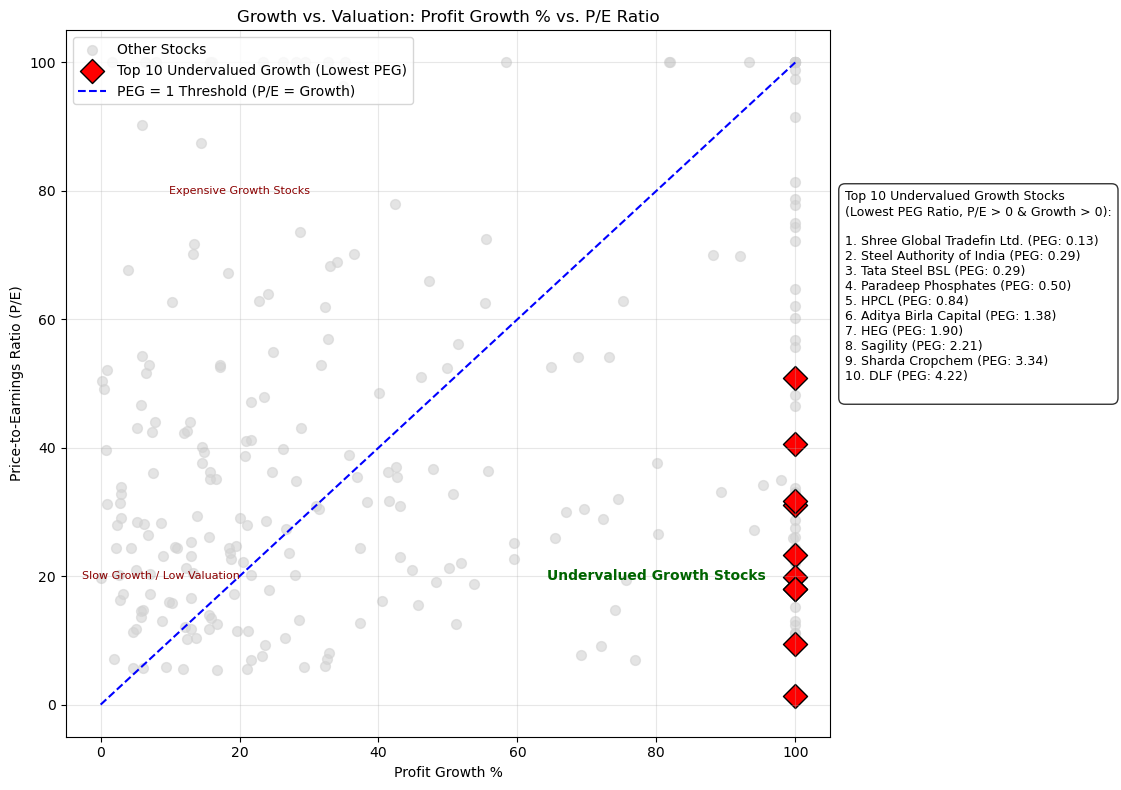

In [29]:
df_filtered = Stock_df[(Stock_df['Price_to_Earnings_ratio (P/E)'] > 0) & (Stock_df['Profit_Growth %'] > 0)].copy()
# Calculating the PEG Ratio: P/E divided by Profit Growth %
df_filtered['PEG_Ratio'] = df_filtered['Price_to_Earnings_ratio (P/E)'] / (df_filtered['Profit_Growth %'] / 100)
df_peg_filtered = df_filtered[df_filtered['PEG_Ratio'] < 100]
top_10_growth = df_peg_filtered.sort_values(by='PEG_Ratio', ascending=True).head(10).copy()
top_10_growth_stocks = top_10_growth['Stock_Name'].tolist()

df_growth_plot = df_filtered.copy()
df_growth_plot['P_E_Clipped'] = df_growth_plot['Price_to_Earnings_ratio (P/E)'].clip(upper=100)
df_growth_plot['Prof_Growth_Clipped'] = df_growth_plot['Profit_Growth %'].clip(upper=100)
top_10_growth_plot = df_growth_plot[df_growth_plot['Stock_Name'].isin(top_10_growth_stocks)]
other_stocks = df_growth_plot[~df_growth_plot['Stock_Name'].isin(top_10_growth_stocks)]

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(other_stocks['Prof_Growth_Clipped'],other_stocks['P_E_Clipped'],color='lightgray',alpha=0.6,s=50,label='Other Stocks')
ax.scatter(top_10_growth_plot['Prof_Growth_Clipped'],top_10_growth_plot['P_E_Clipped'],color='red',alpha=1,s=150,edgecolors='black',marker='D',label='Top 10 Undervalued Growth (Lowest PEG)')
ax.plot([0, 100], [0, 100], color='blue', linestyle='--', linewidth=1.5, label='PEG = 1 Threshold (P/E = Growth)')
ax.text(80, 20, 'Undervalued Growth Stocks', ha='center', va='center', fontsize=10, color='darkgreen', fontweight='bold')
ax.text(20, 80, 'Expensive Growth Stocks', ha='center', va='center', fontsize=8, color='darkred')
ax.text(20, 20, 'Slow Growth / Low Valuation', ha='right', va='center', fontsize=8, color='darkred')

top_10_list_formatted = "Top 10 Undervalued Growth Stocks\n(Lowest PEG Ratio, P/E > 0 & Growth > 0):\n\n"
for rank, row in top_10_growth.iterrows():
    rank_display = top_10_growth.index.get_loc(rank) + 1
    top_10_list_formatted += f"{rank_display}. {row['Stock_Name']} (PEG: {row['PEG_Ratio']:.2f})\n"
plt.figtext(x=0.85, y=0.5,s=top_10_list_formatted,fontsize=9,bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

ax.set_title('Growth vs. Valuation: Profit Growth % vs. P/E Ratio')
ax.set_xlabel('Profit Growth %')
ax.set_ylabel('Price-to-Earnings Ratio (P/E)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

**`Insights:`**

- PEG Ratio =	 P/E Ratio / Profit Growth %
- A stock is generally considered undervalued growth if its PEG Ratio is less than 1.
- We filter for stocks that are both     profitable (P/E > 0)and growing     (Profit Growth > 0).
- Goal is to get lowest PEG ratio.Profit growth max & P/E min.
- We can get undervalued stocks with profit growth pontential.

## Fundamentally Strong Stocks (ROE vs. D/E)

### Is My Stock Fundamentally Strong Stock ?

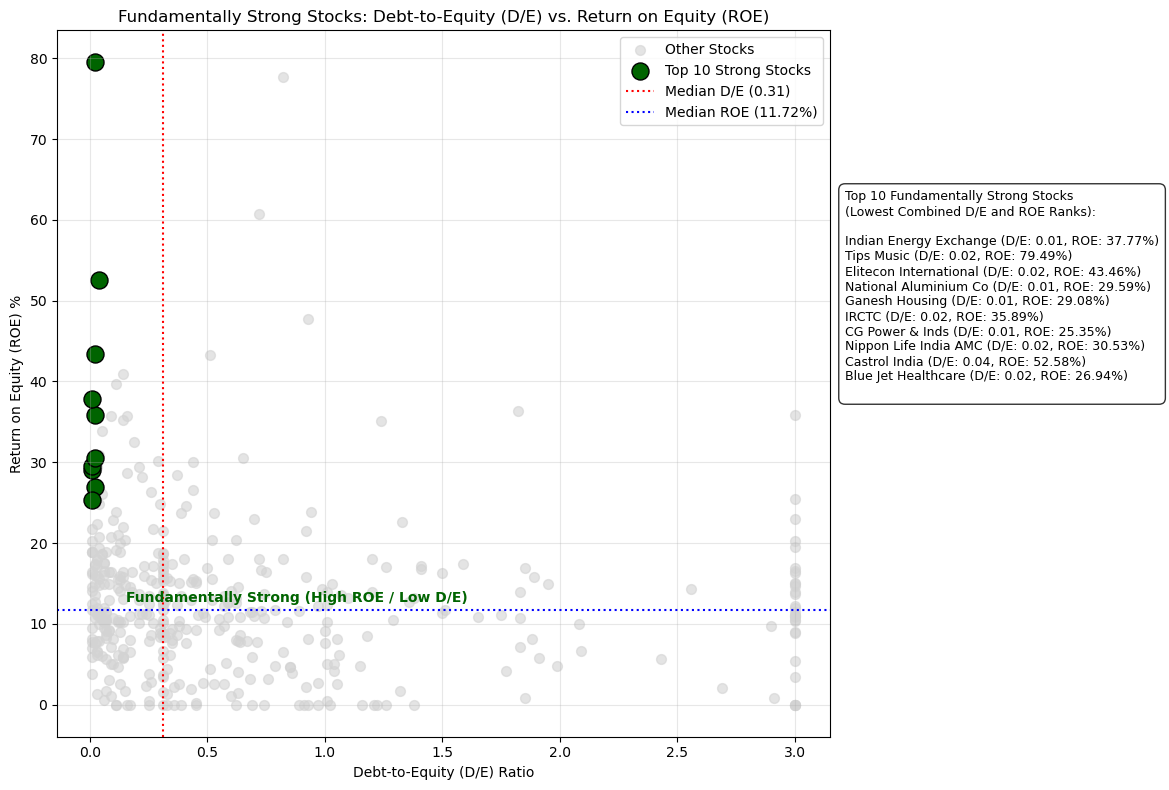

In [31]:
df_filtered = Stock_df[Stock_df['Return_On_Equity (ROE) %'] > 0].copy()
df_filtered = Stock_df[Stock_df['Debt_to_Equity'] > 0].copy()
df_filtered['DE_Rank'] = df_filtered['Debt_to_Equity'].rank(ascending=True)
df_filtered['ROE_Rank'] = df_filtered['Return_On_Equity (ROE) %'].rank(ascending=False)
df_filtered['Strength_Score'] = df_filtered['DE_Rank'] + df_filtered['ROE_Rank']
top_10_financially_strong = df_filtered.sort_values(by='Strength_Score', ascending=True).head(10).copy()
top_10_stocks_name = top_10_financially_strong['Stock_Name'].tolist()
df_plot = df_filtered.copy()
df_plot['D_E_Clipped'] = df_plot['Debt_to_Equity'].clip(lower=-1,upper=3)
df_plot['ROE_Clipped'] = df_plot['Return_On_Equity (ROE) %'].clip(lower=0,upper=150)
top_10_plot = df_plot[df_plot['Stock_Name'].isin(top_10_stocks_name)]
other_stocks = df_plot[~df_plot['Stock_Name'].isin(top_10_stocks_name)]

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(other_stocks['D_E_Clipped'],other_stocks['ROE_Clipped'],color='lightgray',alpha=0.6,s=50,label='Other Stocks')
ax.scatter(top_10_plot['D_E_Clipped'],top_10_plot['ROE_Clipped'],color='darkgreen',alpha=1,s=150,edgecolors='black',marker='o',label='Top 10 Strong Stocks')
median_de = df_plot['D_E_Clipped'].median()
median_roe = df_plot['ROE_Clipped'].median()
ax.axvline(median_de, color='red', linestyle=':', linewidth=1.5, label=f'Median D/E ({median_de:.2f})')
ax.axhline(median_roe, color='blue', linestyle=':', linewidth=1.5, label=f'Median ROE ({median_roe:.2f}%)')
ax.text(median_de * 0.5, median_roe * 1.05, 'Fundamentally Strong (High ROE / Low D/E)', ha='left', va='bottom', fontsize=10, color='darkgreen', fontweight='bold')

top_10_list_formatted = "Top 10 Fundamentally Strong Stocks\n(Lowest Combined D/E and ROE Ranks):\n\n"
for rank, row in top_10_financially_strong.iterrows():
    top_10_list_formatted += f"{row['Stock_Name']} (D/E: {row['Debt_to_Equity']:.2f}, ROE: {row['Return_On_Equity (ROE) %']:.2f}%)\n"
    
plt.figtext(x=0.85, y=0.5,s=top_10_list_formatted,fontsize=9,bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
ax.set_title('Fundamentally Strong Stocks: Debt-to-Equity (D/E) vs. Return on Equity (ROE)')
ax.set_xlabel('Debt-to-Equity (D/E) Ratio')
ax.set_ylabel('Return on Equity (ROE) %')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

**`Insights:`**

- Strength Score = Rank(D/E) + Rank(ROE)
- Goal is to get Low D/E evading the debt risk and high ROE achieving more returns. 
- As this analysis gives us the stocks which functionaing with relatively less debt and providing more return on the investment. Making it a ideal analysis for strength.
- Majorly we can government sectors stocks and saom of the well established larger companies in the top 10.

In [350]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Financially Well Performing Stocks (Growth vs. Profitability)

### Stocks with High Growth and High Profitability

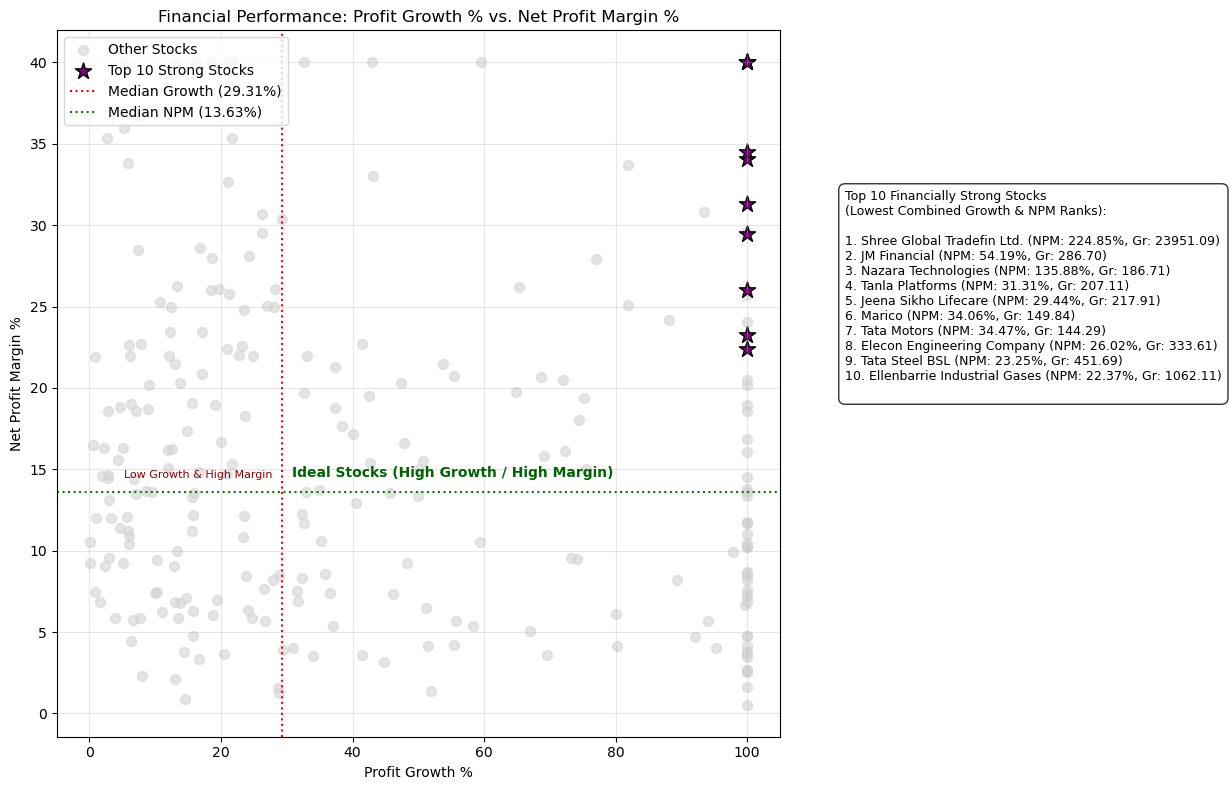

In [362]:
df_filtered = Stock_df[(Stock_df['Net_Profit_Margin %'] > 0) & (Stock_df['Profit_Growth %'] > 0)].copy()
df_filtered['NPM_Rank'] = df_filtered['Net_Profit_Margin %'].rank(ascending=False)
df_filtered['Prof_Growth_Rank'] = df_filtered['Profit_Growth %'].rank(ascending=False)
df_filtered['Performance_Score'] = df_filtered['NPM_Rank'] + df_filtered['Prof_Growth_Rank']
top_10_strong_prof_stocks = df_filtered.sort_values(by='Performance_Score', ascending=True).head(10).copy()
top_10_prof_stocks_names = top_10_strong_prof_stocks['Stock_Name'].tolist()
df_filtered['is_top_10'] = df_filtered['Stock_Name'].isin(top_10_prof_stocks_names)

df_prof_plot = df_filtered.copy()
df_prof_plot['NPM_Clipped'] = df_prof_plot['Net_Profit_Margin %'].clip(upper=40)
df_prof_plot['Prof_Growth_Clipped'] = df_prof_plot['Profit_Growth %'].clip(upper=100)
top_10_plot = df_prof_plot[df_prof_plot['Stock_Name'].isin(top_10_prof_stocks_names)]
other_stocks = df_prof_plot[~df_prof_plot['Stock_Name'].isin(top_10_prof_stocks_names)]
median_growth = df_prof_plot['Prof_Growth_Clipped'].median()
median_npm = df_prof_plot['NPM_Clipped'].median()

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(other_stocks['Prof_Growth_Clipped'],other_stocks['NPM_Clipped'],color='lightgray',alpha=0.6,s=50,label='Other Stocks')
ax.scatter(top_10_plot['Prof_Growth_Clipped'],top_10_plot['NPM_Clipped'],color='purple',alpha=1,s=150,edgecolors='black',marker='*',label='Top 10 Strong Stocks')
ax.axvline(median_growth, color='red', linestyle=':', linewidth=1.5, label=f'Median Growth ({median_growth:.2f}%)')
ax.axhline(median_npm, color='green', linestyle=':', linewidth=1.5, label=f'Median NPM ({median_npm:.2f}%)')
ax.text(median_growth * 1.05, median_npm * 1.05, 'Ideal Stocks (High Growth / High Margin)', ha='left', va='bottom', fontsize=10, color='darkgreen', fontweight='bold')
ax.text(median_growth * 0.95, median_npm * 1.05, 'Low Growth & High Margin', ha='right', va='bottom', fontsize=8, color='darkred')
top_10_strong_list = top_10_strong_prof_stocks[['Stock_Name', 'Net_Profit_Margin %', 'Profit_Growth %', 'Performance_Score']].reset_index(drop=True)
top_10_list_formatted = "Top 10 Financially Strong Stocks\n(Lowest Combined Growth & NPM Ranks):\n\n"
for index, row in top_10_strong_list.iterrows():
    rank_display = index + 1
    top_10_list_formatted += f"{rank_display}. {row['Stock_Name']} (NPM: {row['Net_Profit_Margin %']:.2f}%, Gr: {row['Profit_Growth %']:.2f})\n"
plt.figtext(x=0.85, y=0.5,s=top_10_list_formatted,fontsize=9,bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
ax.set_title('Financial Performance: Profit Growth % vs. Net Profit Margin %')
ax.set_xlabel('Profit Growth %')
ax.set_ylabel('Net Profit Margin %')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()

**`Insights:`**

- Performance =Rank(Profit Growth)+Rank(NPM)
- The lowest Performance Score indicates best balance of high growth and high profitability.
- Stocks with higher profit growth and high Net Profit margin indicates the overall financial growth of the company.
- Nazara Technogies, Tata Motors and Tata Steel are some of the better options with good financial performance.

## Multivariate 

### Corelation Heat map

In [370]:
Stock_df.select_dtypes("number").head()

,Current_Price (₹),Return_On_Equity (ROE) %,Price_to_Earnings_ratio (P/E),Industry P/E,Earnings_per_share (EPS),Price_to_Book_ratio (P/B),Dividend Yield %,Debt_to_Equity,Revenue_Growth %,Profit_Growth %,Net_Profit_Margin %,EBITDA Margin %
0,864.35,15.37,16.17,21.60,53.80,2.68,0.80,0.26,25.08,40.52,12.92,18.70
1,513.90,23.74,39.59,39.18,13.03,9.75,0.19,0.39,-7.22,0.82,7.49,10.25
2,764.00,12.82,26.08,14.52,29.27,3.34,0.13,0.31,21.29,15.58,13.27,15.01
3,265.10,13.00,30.10,51.73,8.84,3.62,0.00,0.21,22.94,-30.55,1.34,2.63
4,512.90,14.31,23.59,20.31,21.91,3.53,0.00,2.56,19.38,18.60,27.98,74.86


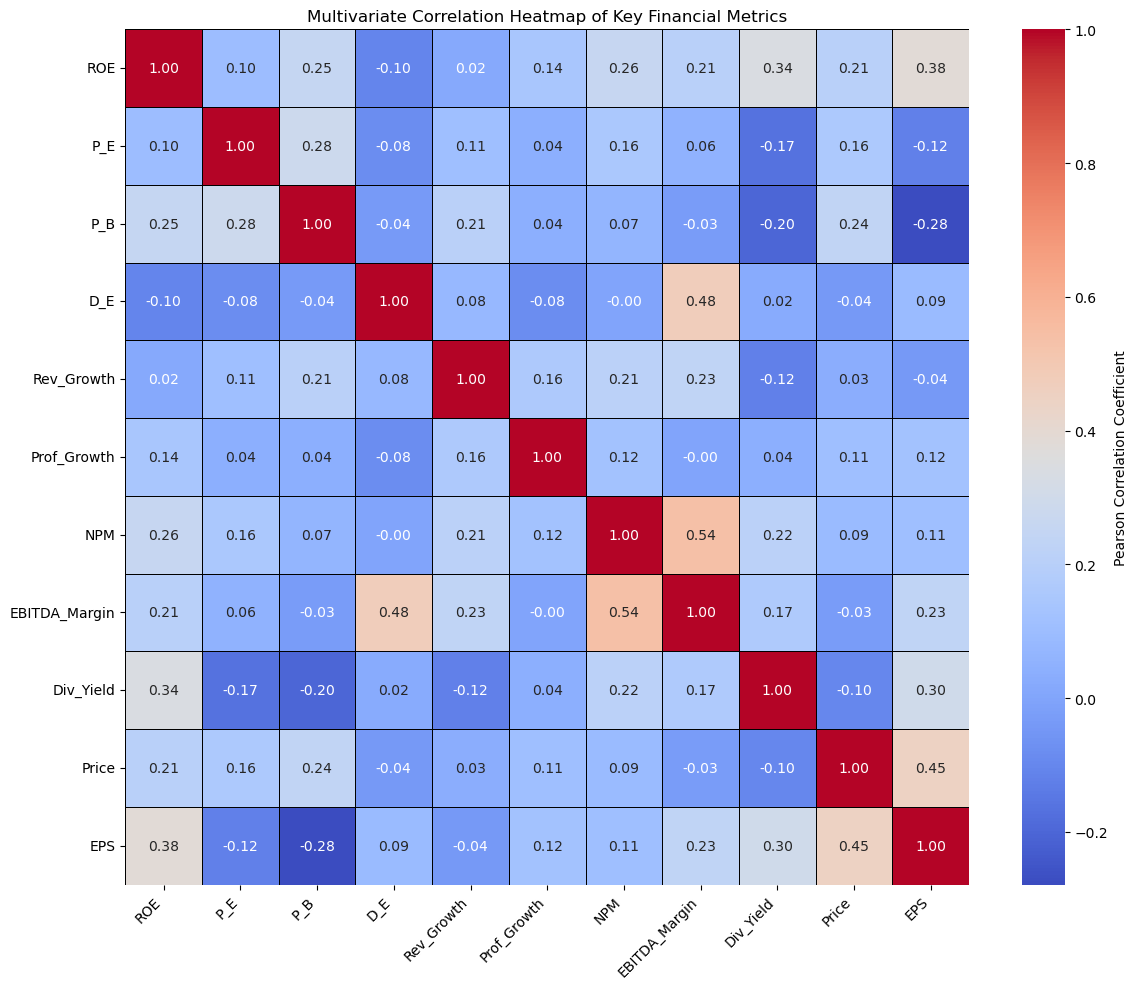

In [369]:
df = Stock_df.rename(columns={
    'Current_Price (₹)': 'Price',
    'Return_On_Equity (ROE) %': 'ROE',
    'Price_to_Earnings_ratio (P/E)': 'P_E',
    'Industry P/E': 'Industry_PE',
    'Earnings_per_share (EPS)': 'EPS',
    'Price_to_Book_ratio (P/B)': 'P_B',
    'Dividend Yield %': 'Div_Yield',
    'Debt_to_Equity': 'D_E',
    'Revenue_Growth %': 'Rev_Growth',
    'Profit_Growth %': 'Prof_Growth',
    'Net_Profit_Margin %': 'NPM',
    'EBITDA Margin %': 'EBITDA_Margin'
})
numerical_cols = [
    'ROE', 'P_E', 'P_B', 'D_E',
    'Rev_Growth', 'Prof_Growth',
    'NPM', 'EBITDA_Margin', 'Div_Yield', 
    'Price', 'EPS'
]
corr_df = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
clip_limits = {
    'ROE': 100, 'P_E': 100, 'P_B': 20, 'D_E': 5,
    'Rev_Growth': 200, 'Prof_Growth': 200,
    'NPM': 100, 'EBITDA_Margin': 100, 'Div_Yield': 10,
    'Price': 1000, 'EPS': 100
}
for col, limit in clip_limits.items():
    if col in corr_df.columns:
        lower_bound = corr_df[col].quantile(0.01) if not corr_df[col].isnull().all() else 0
        corr_df[col] = corr_df[col].clip(lower=lower_bound, upper=limit)
corr_df.replace([np.inf, -np.inf], np.nan, inplace=True)
corr_df.fillna(corr_df.median(), inplace=True)
correlation_matrix = corr_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm',cbar_kws={'label':'Pearson Correlation Coefficient'},linewidths=0.5,linecolor='black')
plt.title('Multivariate Correlation Heatmap of Key Financial Metrics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**`Insights:`**

- Return on Equity (ROE) and Net Profit Margin (NPM): Comapnies with high profit trend to generate more return.
- Earnings Per Share (EPS) and Current Price (Price): 0.45. This is fundamental: higher EPS often leads to a higher stock price.
- Debt-to-Equity (D_E) and ROE : (-0.10) . The relationships are generally weak, indicating that debt level is not a primary driver of stock performance or valuation
- Rev_Growth and Prof_Growth: A moderate positive correlation (0.16). This is expected but not extremely high, suggesting that many companies are growing revenue without proportional profit growth.


## Fundamentally Strong Stocks

### Relative P/E vs ROE vs D/E vs Div Yield

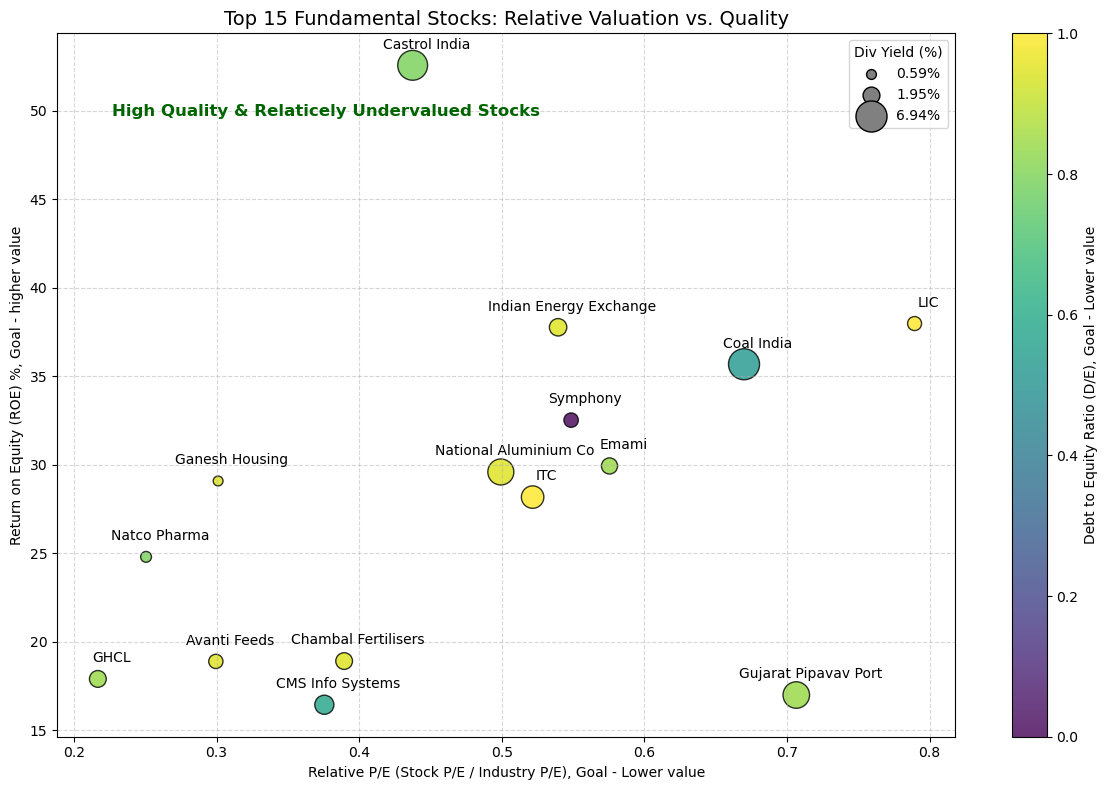

In [409]:
screening_cols = ['Stock_Name', 'P_E', 'Industry_PE', 'ROE', 'D_E', 'Div_Yield']
df_screen = df[screening_cols].copy()

## Calculating the Relative PE:
df_screen['PE_Relative'] = df_screen['P_E'] / df_screen['Industry_PE']
df_screen.loc[df_screen['PE_Relative'] < 0, 'PE_Relative'] = 1000 

## Applying the condtions:
df_passed = df_screen[
    (df_screen['PE_Relative'] <= 0.80) & 
    (df_screen['ROE'] >= 15) & 
    (df_screen['D_E'] <= 0.5) & 
    (df_screen['Div_Yield'] > 0)
].copy()

metrics_rank = {
    'ROE': 'desc', 'Div_Yield': 'desc', ## As we need the highest values keeping it desc - descending
    'PE_Relative': 'asc', 'D_E': 'asc' ## As we need the lowest values keeping it aesc - aescending
}
for column, direction in metrics_rank.items():
    ascending_val = True if direction == 'asc' else False
    df_passed[f'{column}_Rank'] = df_passed[column].rank(method='min', ascending=ascending_val)

## Finding the sum of the metrics
rank_cols = [f'{col}_Rank' for col in metrics_rank.keys()]
df_passed['Final_Score'] = df_passed[rank_cols].sum(axis=1)
top_n = min(15, df_passed.shape[0])
top_n_stocks = df_passed.sort_values(by='Final_Score', ascending=True).head(top_n).copy()

# Taking Div_yeild as size of the markers in the plot:
min_div = top_n_stocks['Div_Yield'].min()
max_div = top_n_stocks['Div_Yield'].max()
if max_div != min_div:
    # Scale Div_Yield to a size range (e.g., 50 to 500)
    top_n_stocks['Size'] = ((top_n_stocks['Div_Yield'] - min_div) / (max_div - min_div)) * 450 + 50
    div_yield_legend_values = [min_div, top_n_stocks['Div_Yield'].quantile(0.5), max_div]
    legend_sizes = ((np.array(div_yield_legend_values) - min_div) / (max_div - min_div)) * 450 + 50
else:
    top_n_stocks['Size'] = 250
    div_yield_legend_values = [min_div]
    legend_sizes = [250]

# b) Taking markers color based on D_E values:
min_de = top_n_stocks['D_E'].min()
max_de = top_n_stocks['D_E'].max()
if max_de != min_de:
    top_n_stocks['Color_Value'] = 1 - (top_n_stocks['D_E'] - min_de) / (max_de - min_de)
else:
    top_n_stocks['Color_Value'] = 1.0
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(top_n_stocks['PE_Relative'],top_n_stocks['ROE'],s=top_n_stocks['Size'],c=top_n_stocks['Color_Value'],cmap='viridis',alpha=0.8,edgecolors='black',linewidths=1)
# Colorbar for D/E
plt.colorbar(scatter, label='Debt to Equity Ratio (D/E), Goal - Lower value')
for i in range(len(top_n_stocks)):
    plt.annotate(top_n_stocks.iloc[i]['Stock_Name'],(top_n_stocks.iloc[i]['PE_Relative'], top_n_stocks.iloc[i]['ROE']),
        textcoords="offset points",
        xytext=(10,12),
        ha='center',
        fontsize=10)
ax.set_title(f'Top {top_n} Fundamental Stocks: Relative Valuation vs. Quality', fontsize=14)
ax.set_xlabel('Relative P/E (Stock P/E / Industry P/E), Goal - Lower value')
ax.set_ylabel('Return on Equity (ROE) %, Goal - higher value')
ax.text(top_n_stocks['PE_Relative'].min() + 0.01, top_n_stocks['ROE'].max() * 0.95,
         'High Quality & Relaticely Undervalued Stocks',
         ha='left', va='center', fontsize=12, color='darkgreen', fontweight='bold')
legend_handles = []
for size in legend_sizes:
    legend_handles.append(ax.scatter([], [], s=size, color='gray', edgecolors='black', linewidths=1))
div_yield_legend_labels = [f'{v:.2f}%' for v in div_yield_legend_values]
ax.legend(legend_handles, div_yield_legend_labels, loc="upper right", title="Div Yield (%)", scatterpoints=1)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('top_15_weighted_scatter_plot.png')
plt.show()

**`Insights:`**

- Conditions used:
    1. PE_Relative <= 0.80 (Stock P/E is at least 20% lower than Industry P/E)
    2. ROE >= 15 (ROE is 15% or higher)
    3. D_E <= 0.5 (Debt to Equity - 0.5 or lower)
    4. Div_Yield > 0 (Must pay a dividend)
- The stocks that passed the filter were ranked based on the combined performance across these four metrics.
- From the plot, Majorly got FMCG, Pharma, PSU and mineral / mining companies.
- Natco Pharma, Castrol India, Coal India and GHCl are some of the fundamentally strong stocks.


## Financial well Performance Stocks

### Rev_Growth vs Prof_Growth vs NPM vs EBITDA_Margin

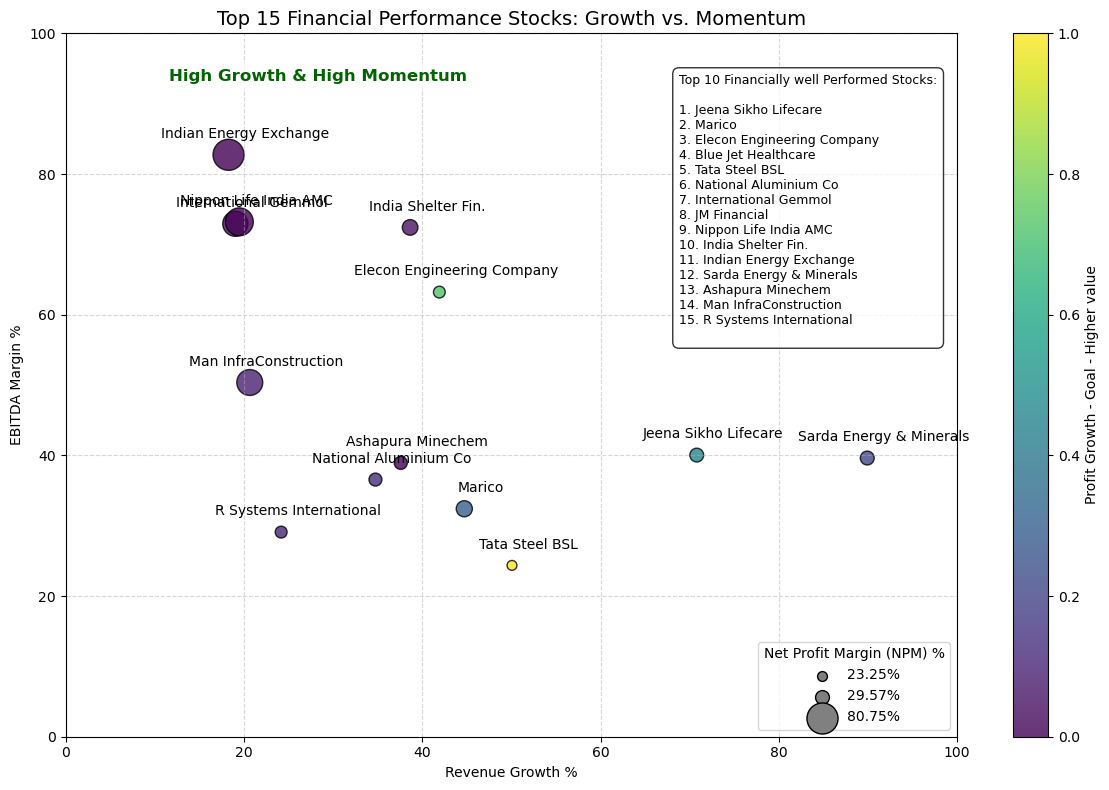

In [460]:
performance_cols = ['Stock_Name', 'Rev_Growth', 'Prof_Growth', 'NPM', 'EBITDA_Margin', 'ROE']
df_performance = df[performance_cols].copy()

## Applying Conditions:
df_positive = df_performance[
    (df_performance['Rev_Growth'] > 0) & 
    (df_performance['Prof_Growth'] > 0) & 
    (df_performance['Prof_Growth'] < 600) & 
    (df_performance['NPM'] > 0) & 
    (df_performance['EBITDA_Margin'] > 0)
].copy()
metrics_rank = {
    'Rev_Growth': 'desc', 'Prof_Growth': 'desc', 'NPM': 'desc', 
    'EBITDA_Margin': 'desc', 'ROE': 'desc' # As we need higher value, arranging in descending order.
}
for col, direction in metrics_rank.items():
    ascending_val = True if direction == 'asc' else False
    df_positive[f'{col}_Rank'] = df_positive[col].rank(method='min', ascending=ascending_val)
rank_cols = [f'{col}_Rank' for col in metrics_rank.keys()]
df_positive['Performance_Score'] = df_positive[rank_cols].sum(axis=1)
top_n = min(15, df_positive.shape[0])
top_n_stocks = df_positive.sort_values(by='Performance_Score', ascending=True).head(top_n).copy()

# a) Size of the markers based on NPM
min_npm = top_n_stocks['NPM'].min()
max_npm = top_n_stocks['NPM'].max()
if max_npm != min_npm:
    top_n_stocks['Size'] = ((top_n_stocks['NPM'] - min_npm) / (max_npm - min_npm)) * 450 + 50
    npm_legend_values = [min_npm, top_n_stocks['NPM'].quantile(0.5), max_npm]
    legend_sizes = ((np.array(npm_legend_values) - min_npm) / (max_npm - min_npm)) * 450 + 50
else:
    top_n_stocks['Size'] = 250
    npm_legend_values = [min_npm]
    legend_sizes = [250]
min_prof_growth = top_n_stocks['Prof_Growth'].min()
max_prof_growth = top_n_stocks['Prof_Growth'].max()
if max_prof_growth != min_prof_growth:
    top_n_stocks['Color_Value'] = (top_n_stocks['Prof_Growth'] - min_prof_growth) / (max_prof_growth - min_prof_growth)
else:
    top_n_stocks['Color_Value'] = 1.0
    
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(top_n_stocks['Rev_Growth'],top_n_stocks['EBITDA_Margin'],s=top_n_stocks['Size'],c=top_n_stocks['Color_Value'],cmap='viridis', alpha=0.8,edgecolors='black',linewidths=1)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.colorbar(scatter, label='Profit Growth - Goal - Higher value')
for i in range(len(top_n_stocks)):
    x_val = top_n_stocks.iloc[i]['Rev_Growth']
    y_val = top_n_stocks.iloc[i]['EBITDA_Margin']
    if x_val < 100 and y_val < 100:
        x_pos, y_pos = x_val, y_val
        text_coords = (5, 5)
    else:
        x_pos = 150 # Max X position
        y_pos = 150 # Max Y position
        text_coords = (5, -15 * (i % 3)) # Stagger labels for outliers
        
    plt.annotate(top_n_stocks.iloc[i]['Stock_Name'],(x_pos, y_pos),textcoords="offset points",xytext=(12,12),ha='center',fontsize=10,fontweight='bold' if x_val > 100 or y_val > 100 else 'normal')

top_15_growth_list = top_n_stocks[['Stock_Name']].reset_index(drop=True)
top_15_list_formatted = "Top 10 Financially well Performed Stocks:\n\n"
for index, row in top_15_growth_list.iterrows():
    rank_display = index + 1
    top_15_list_formatted += f"{rank_display}. {row['Stock_Name']}\n"
plt.figtext(x=0.57, y=0.57,s=top_15_list_formatted,fontsize=9,bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

ax.set_title(f'Top {top_n} Financial Performance Stocks: Growth vs. Momentum', fontsize=14)
ax.set_xlabel('Revenue Growth %')
ax.set_ylabel('EBITDA Margin %')
ax.text(45, 95,
         'High Growth & High Momentum',
         ha='right', va='top', fontsize=12, color='darkgreen', fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
legend_handles = []
for size in legend_sizes:
    legend_handles.append(ax.scatter([], [], s=size, color='gray', edgecolors='black', linewidths=1))
npm_legend_labels = [f'{v:.2f}%' for v in npm_legend_values]
ax.legend(legend_handles, npm_legend_labels, loc="lower right", title="Net Profit Margin (NPM) %", scatterpoints=1)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**`Insights:`**

- The stocks were ranked based on a combination of Revenue Growth, Profit Growth, Net Profit Margin (NPM) and EBITDA Margin with goal of higher value.
- Stocks with high revenue and EBITA margin does fail in generating a high profit growth indicating a higher growth potential in a long term with the risk of debt.
- Tata Steel BSL, National Alumnium co - mineral / mining companies.
- Indian Energy Exchange, Sarda Energy & Minerals - Engery sector.
- JM Financial and Nippon Life insurance AMC - Finance sectors.

## Pairwise plot for Stock Fundamentals

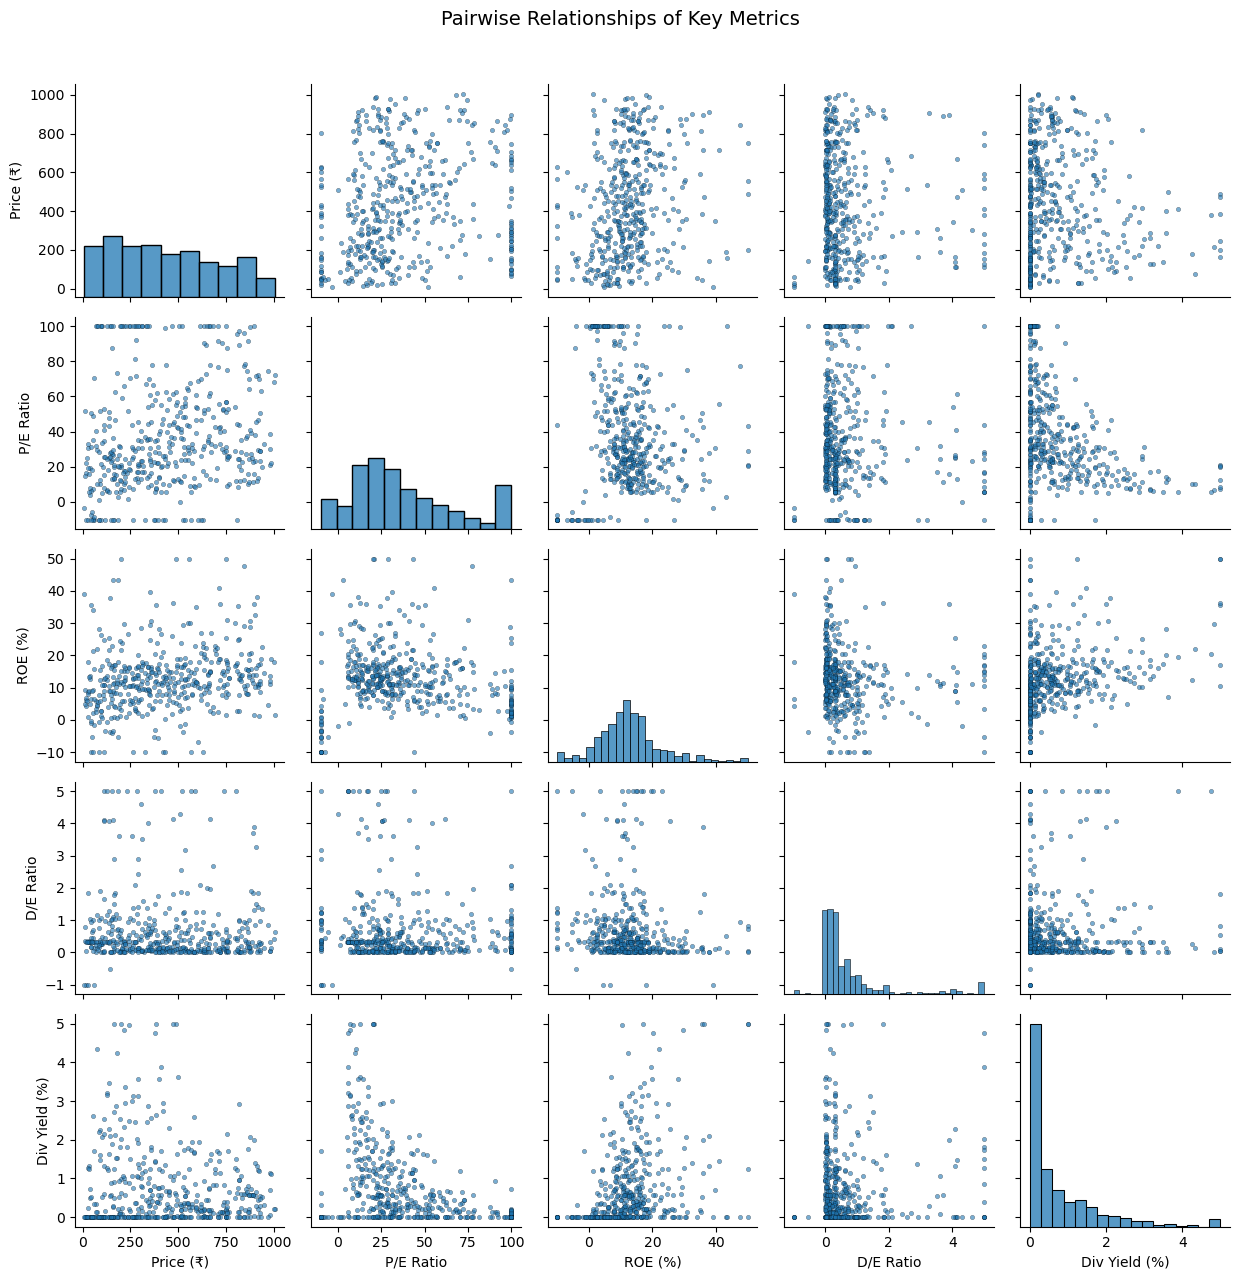

In [465]:
plot_cols = ['Price', 'P_E', 'ROE', 'D_E', 'Div_Yield']
df_plot = df[plot_cols].copy()
# Rename columns for better plot labels
df_plot.columns = ['Price (₹)', 'P/E Ratio', 'ROE (%)', 'D/E Ratio', 'Div Yield (%)']
plot_cols_renamed = df_plot.columns.tolist()
CLIP_MAX_PRICE = 1500
CLIP_MAX_PE = 100.0
CLIP_MIN_PE = -10.0
CLIP_MAX_ROE = 50.0
CLIP_MIN_ROE = -10.0
CLIP_MAX_DE = 5.0
CLIP_MIN_DE = -1.0
CLIP_MAX_DIV = 5.0
df_clipped = df_plot.copy()
df_clipped['Price (₹)'] = np.clip(df_clipped['Price (₹)'], None, CLIP_MAX_PRICE)
df_clipped['P/E Ratio'] = np.clip(df_clipped['P/E Ratio'], CLIP_MIN_PE, CLIP_MAX_PE)
df_clipped['ROE (%)'] = np.clip(df_clipped['ROE (%)'], CLIP_MIN_ROE, CLIP_MAX_ROE)
df_clipped['D/E Ratio'] = np.clip(df_clipped['D/E Ratio'], CLIP_MIN_DE, CLIP_MAX_DE)
df_clipped['Div Yield (%)'] = np.clip(df_clipped['Div Yield (%)'], None, CLIP_MAX_DIV)
g = sns.pairplot(df_clipped, diag_kind='hist', plot_kws={'alpha': 0.6, 'edgecolor': 'k', 's': 10},diag_kws={'edgecolor': 'k'})
g.fig.suptitle('Pairwise Relationships of Key Metrics', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

**`Insights:`**

- Price (₹) vs. Fundamentals - higher prices shows a slight tendency to correlate with better fundamentals  indicating the market rewards quality over time.
- ROE (%) vs. D/E Ratio - Most stocks that can achieve high ROE do so with low D/E. The scatter plot confirms that high profitability is achieved across the range of conservative debt levels.
- Price (₹) and Div Yield (%): Both will be highly concentrated at the lower end of their respective ranges, with long tails indicating the presence of a few very expensive or high-dividend-paying stocks.
- P/E Ratio vs. ROE (%) - High-quality companies (high ROE) tend to command a higher P/E ratio.
- Some of the values are clipped to get better understanding.
